In [33]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer_segmentation.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

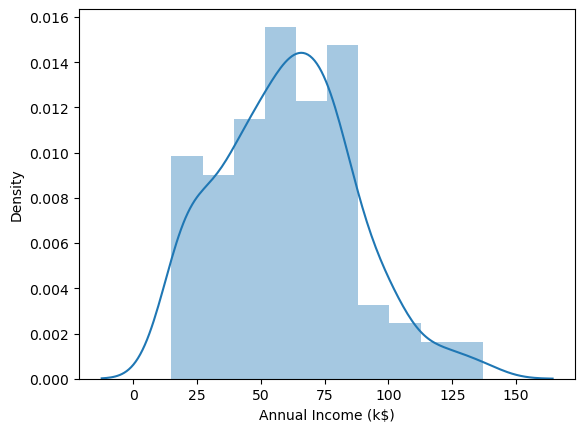

In [5]:
sns.distplot(df['Annual Income (k$)'])

In [6]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

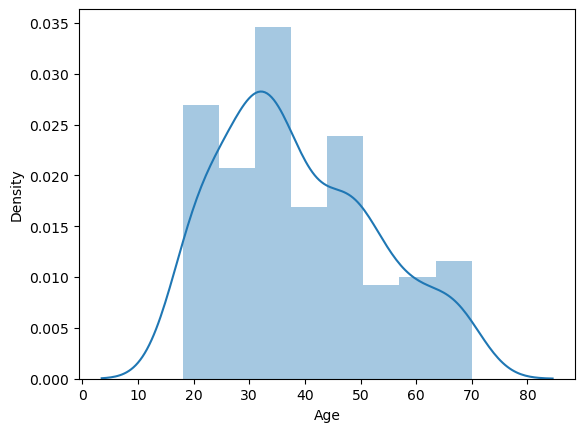

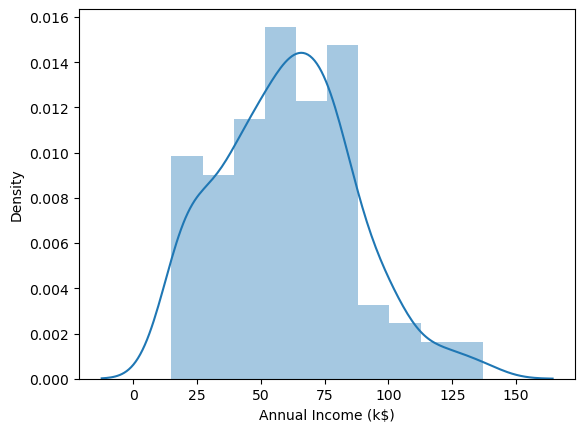

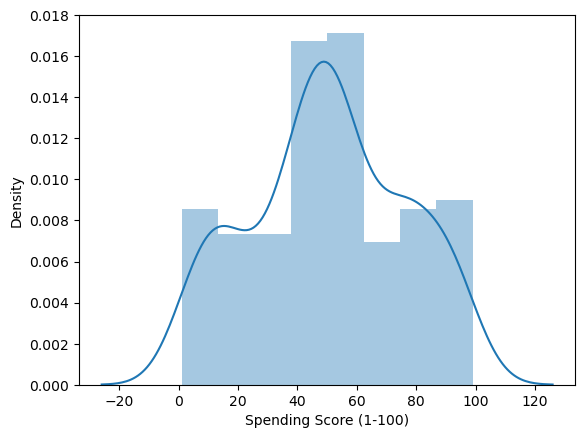

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

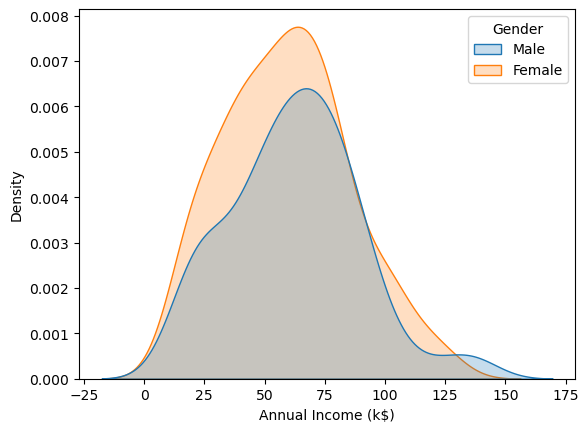

In [8]:
sns.kdeplot(df['Annual Income (k$)'],shade=True, hue=df['Gender']);

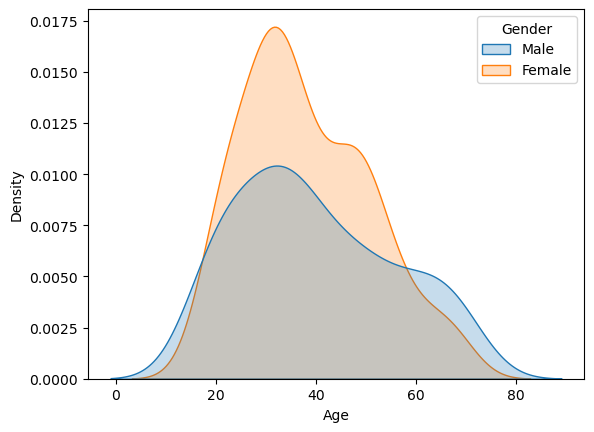

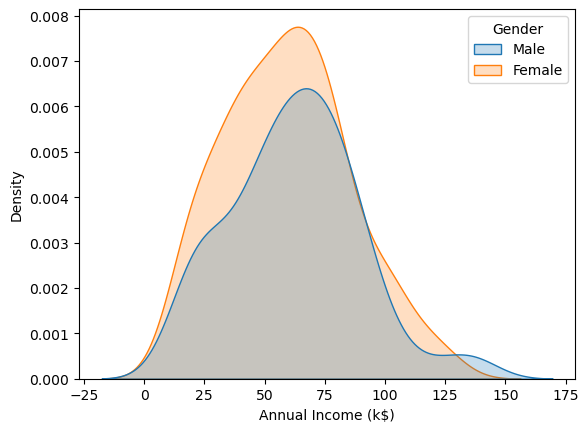

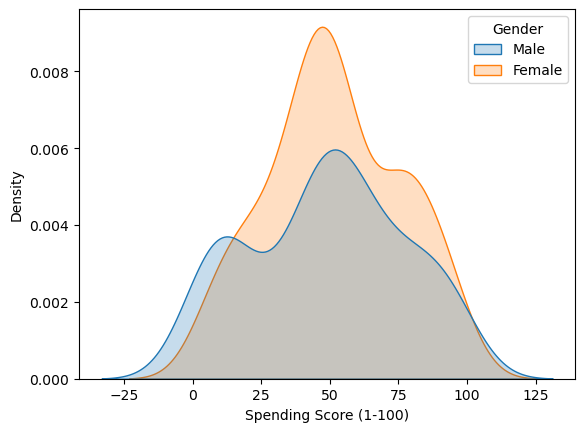

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True, hue=df['Gender']);

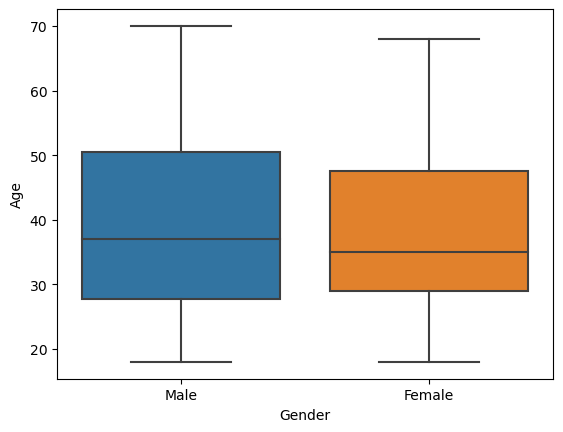

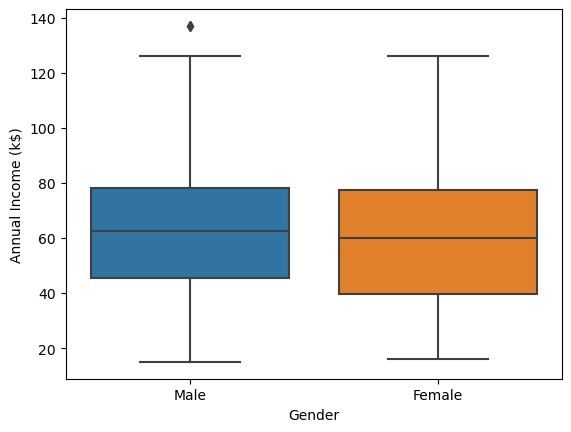

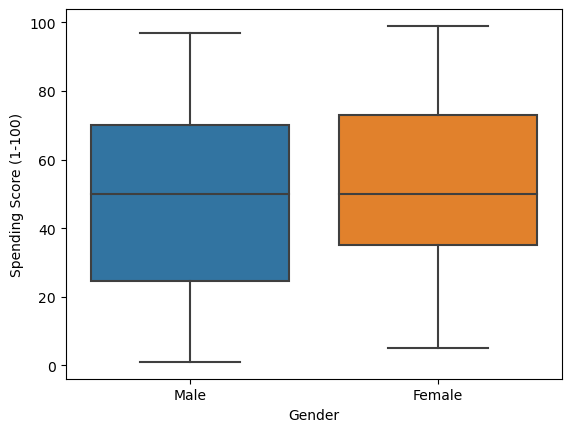

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [11]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

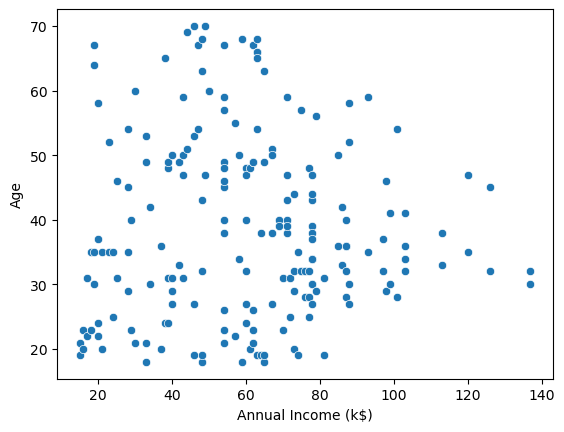

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

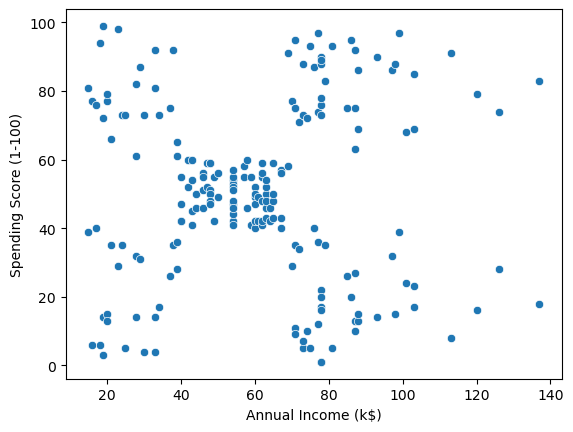

In [14]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

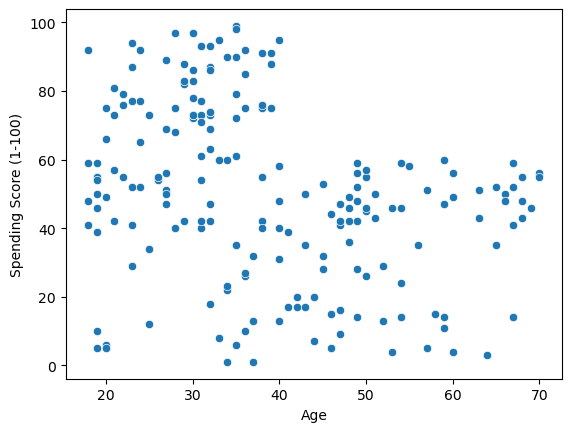

In [15]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')

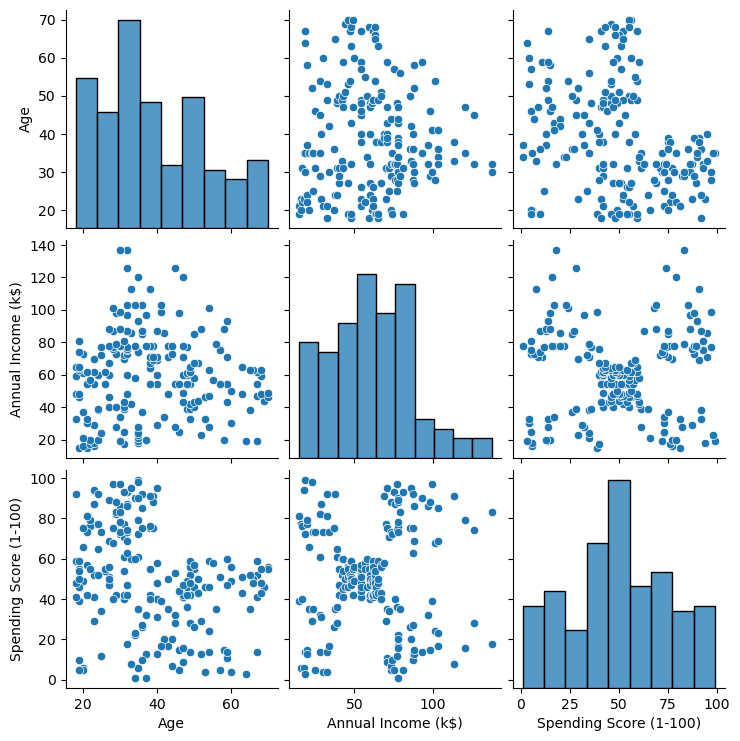

In [27]:
df=df.drop('CustomerID', axis=1)
sns.pairplot(df)

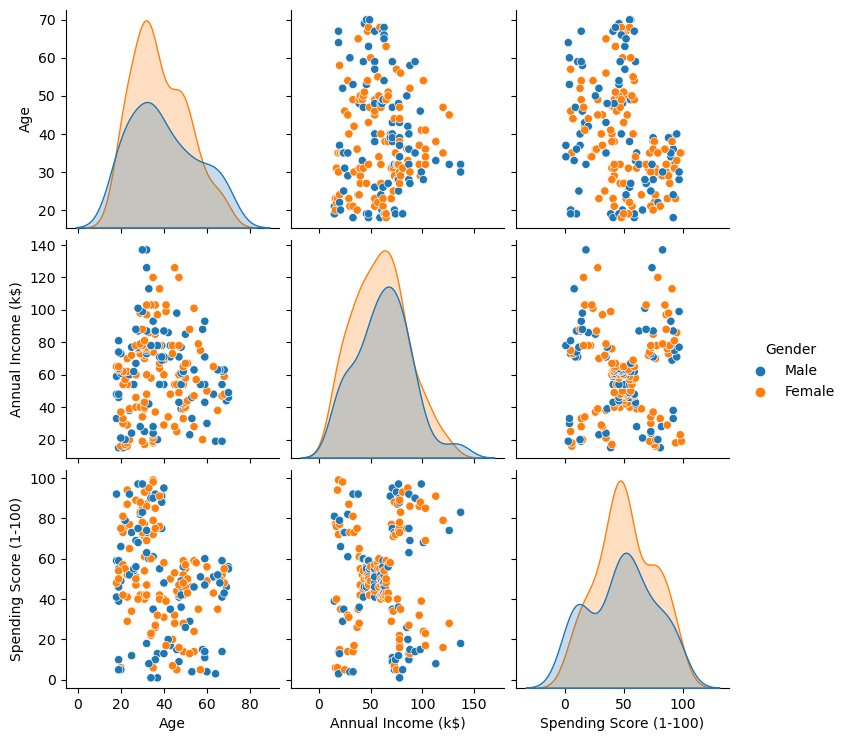

In [29]:

sns.pairplot(df,hue='Gender')

In [18]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [19]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:ylabel='Gender'>

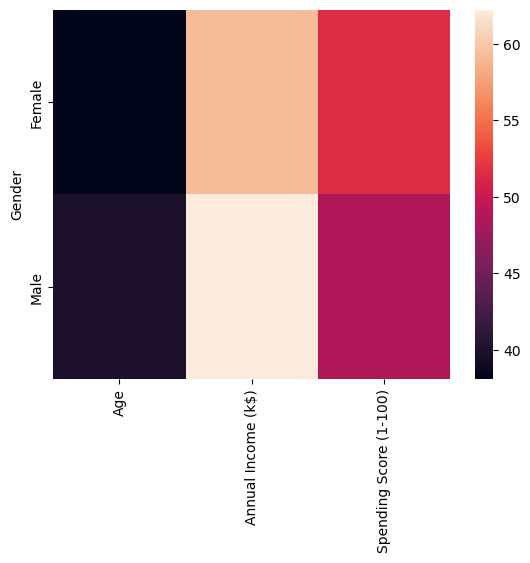

In [20]:
sns.heatmap(df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean())

<AxesSubplot:>

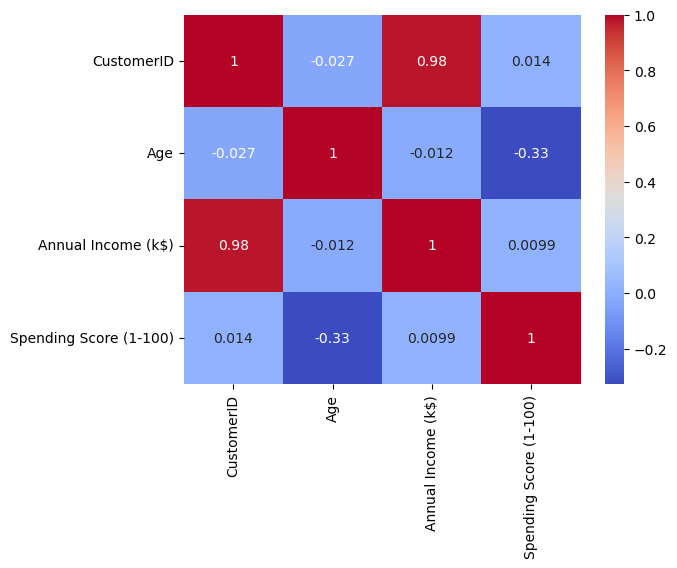

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Cluster - Univariate, Bivariate, Multivariate

In [56]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [57]:
#km.fit_predict(df[['Age', 'Annual Income (k$)']])

In [58]:
km.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [59]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [60]:
df['Income Cluster'] = km.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [61]:
df['Income Cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    1
197    1
198    1
199    1
Name: Income Cluster, Length: 200, dtype: int32>

In [62]:
km.inertia_
#distance between the centriod

23517.330930930933

In [63]:
#Elbow method
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [65]:
inertia_scores

[137277.27999999997,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3949.275613275613,
 2822.4996947496948,
 2258.1100415923947,
 1762.9541125541127]

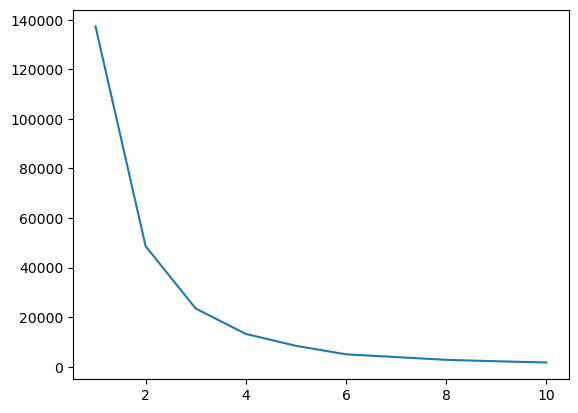

In [66]:
plt.plot(range(1,11),inertia_scores)
#Elbow started at 3 so we need to change the number of clusters to 3

In [68]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,37.833333,99.888889,50.638889
2,39.500000,33.486486,50.229730


In [70]:
#Bivariate Clustering


In [82]:
km2 = KMeans(n_clusters=5)

In [83]:
km2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])


KMeans(n_clusters=5)

In [84]:
df['Spending and Income Cluster'] = km2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3


In [85]:
#Elbow method
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

In [86]:
inertia_scores2

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37265.86520484347,
 30273.39431207004,
 25011.920255473768,
 21818.11458845218,
 19664.685196005543]

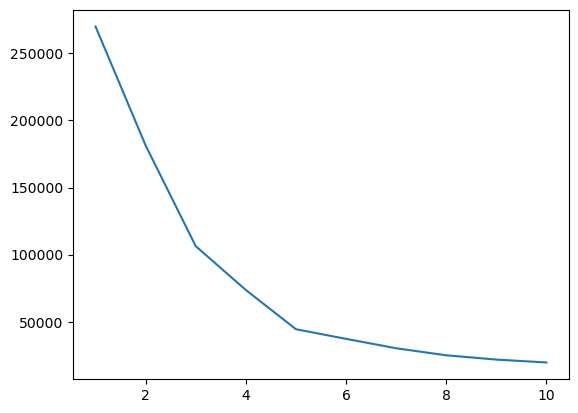

In [87]:
plt.plot(range(1,11),inertia_scores2)
#Elbow started at 5 so we need to change the number of clusters to 5

In [88]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [98]:
centers = pd.DataFrame(km2.cluster_centers_)
centers.columns = ['x','y']

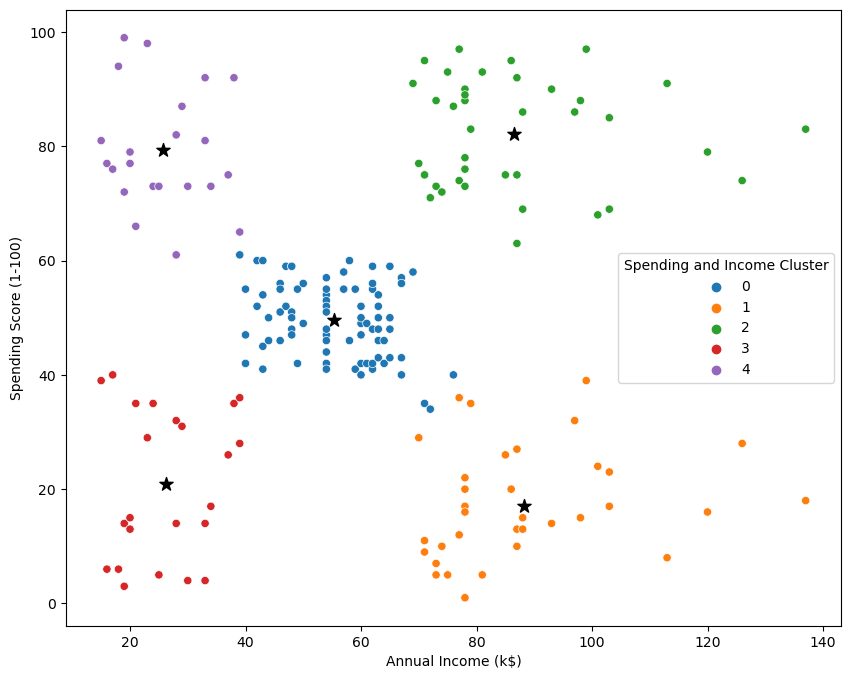

In [120]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='Spending and Income Cluster', palette= 'tab10')
plt.savefig('Bivariate_clustering.png')

In [101]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [102]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


# Multivariate clustering

In [104]:
from sklearn.preprocessing import StandardScaler
#scale 

In [105]:
scale = StandardScaler()

In [106]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3


In [109]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,3,1
1,21,15,81,2,4,1
2,20,16,6,2,3,0
3,23,16,77,2,4,0
4,31,17,40,2,3,0


In [111]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [113]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [115]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [117]:
dff.head

<bound method NDFrame.head of             0         1         2         3
0   -1.424569 -1.738999 -0.434801  1.128152
1   -1.281035 -1.738999  1.195704  1.128152
2   -1.352802 -1.700830 -1.715913 -0.886405
3   -1.137502 -1.700830  1.040418 -0.886405
4   -0.563369 -1.662660 -0.395980 -0.886405
..        ...       ...       ...       ...
195 -0.276302  2.268791  1.118061 -0.886405
196  0.441365  2.497807 -0.861839 -0.886405
197 -0.491602  2.497807  0.923953  1.128152
198 -0.491602  2.917671 -1.250054  1.128152
199 -0.635135  2.917671  1.273347  1.128152

[200 rows x 4 columns]>

In [118]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

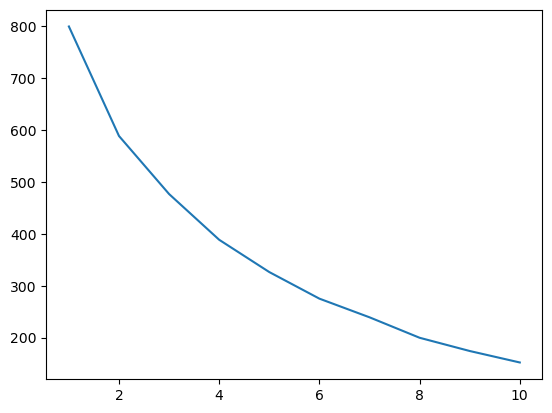

In [119]:
plt.plot(range(1,11),inertia_scores3)

In [121]:
df


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3
...,...,...,...,...,...,...
195,Female,35,120,79,1,2
196,Female,45,126,28,1,1
197,Male,32,126,74,1,2
198,Male,32,137,18,1,1


In [122]:
df.to_csv('Clustering.CSV')
#Save file as CSV format